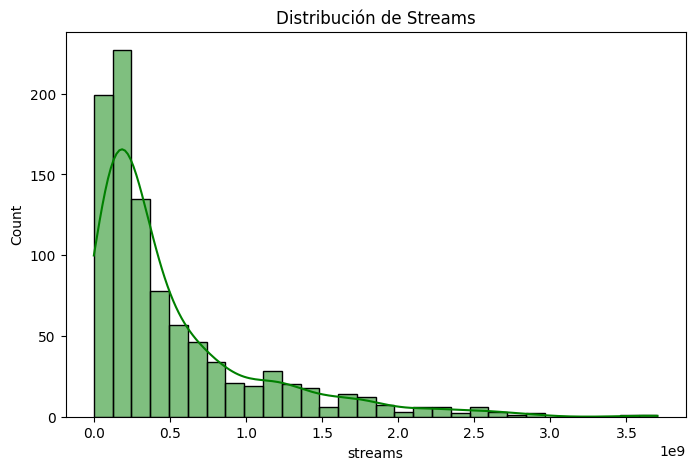

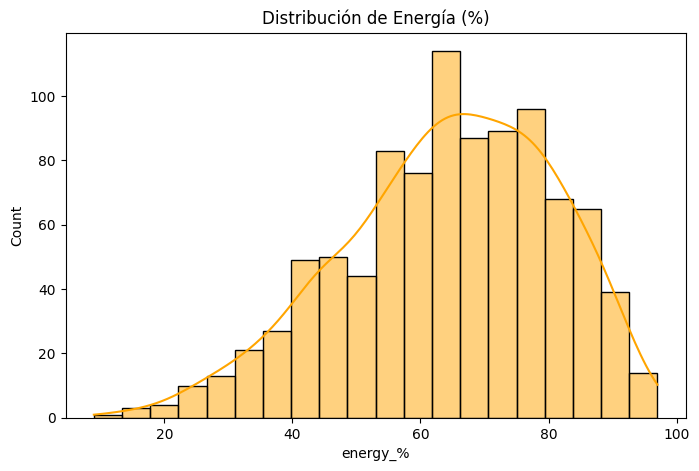

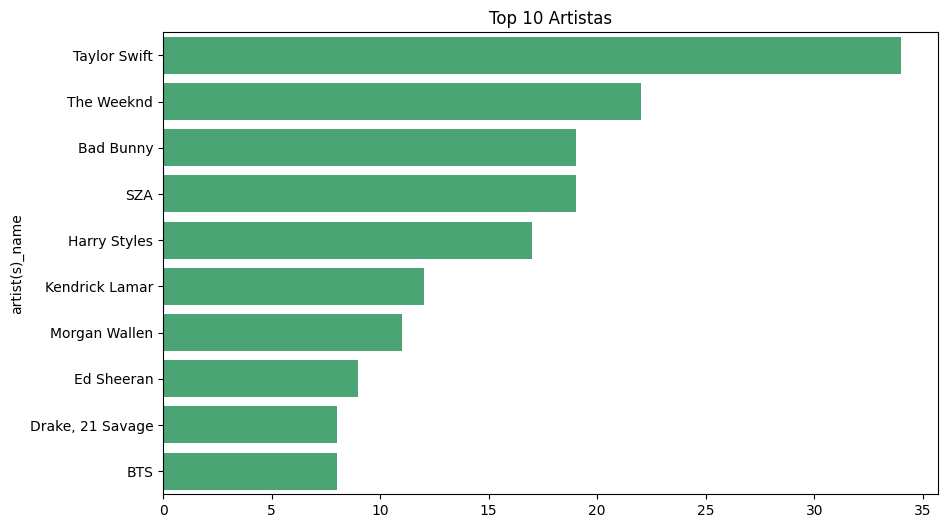

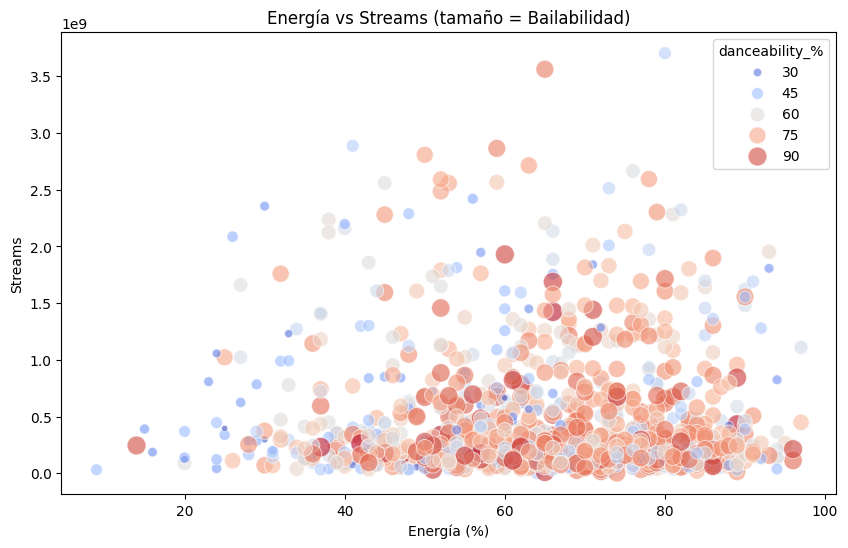

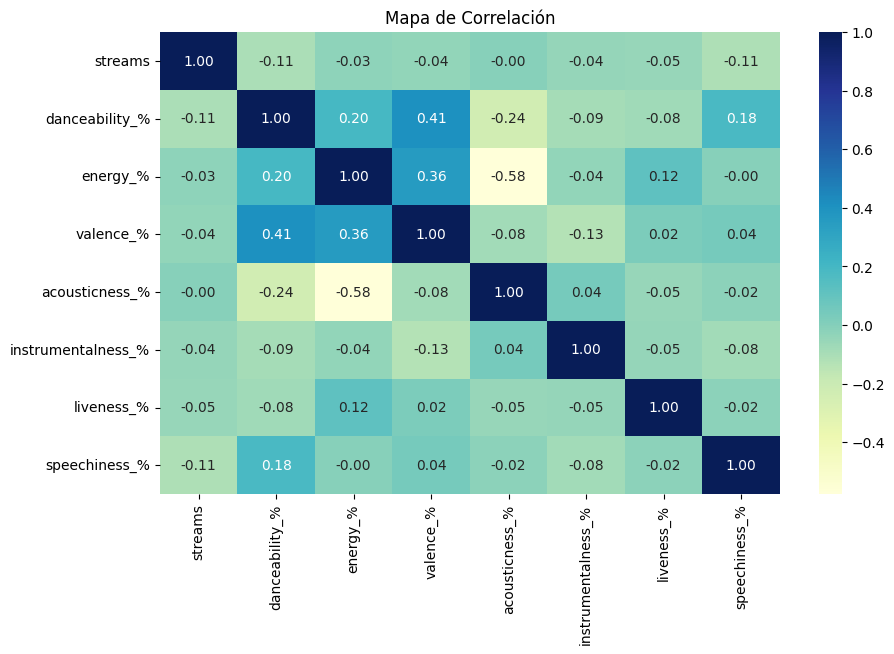

✅ PDF generado en: C:\Users\pablo\OneDrive\Desktop\DataScience1\Pablo\PrimerEntrega\resultados\spotify_2023_analisis.pdf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import getSampleStyleSheet

## Abstract:
# Este análisis examina el desempeño de canciones en Spotify durante 2023, considerando métricas como streams, energía, bailabilidad y valencia. Se busca identificar patrones de popularidad y características musicales que influyen en el éxito de las canciones.

# Preguntas de interés:
# 1-¿Qué artistas aparecen con mayor frecuencia en los datos?
# 2-¿Cómo se relacionan streams, energía y bailabilidad de las canciones?
# 3-¿Existen correlaciones entre diferentes características musicales (energía, valencia, bailabilidad, acústica)?

## Hipótesis:
# 1-Las canciones con mayor energía y bailabilidad tienden a tener más streams.
# 2-Artistas más frecuentes en la lista de datos generan canciones con métricas más consistentes en términos de streams y popularidad.
# 3-Características musicales como energía y valencia presentan correlaciones significativas con la popularidad de la canción.

BASE_PATH = os.path.dirname(BASE_PATH)
DATA_PATH = os.path.join(BASE_PATH,"data","spotify-2023.csv")
RESULTS_PATH = os.path.join(BASE_PATH,"resultados")
os.makedirs(RESULTS_PATH, exist_ok=True)

# Leer CSV
df = pd.read_csv(DATA_PATH, encoding="latin1", header=None)
df.columns = [
    'track_name','artist(s)_name','artist_count','released_year','released_month','released_day',
    'in_spotify_playlists','in_spotify_charts','streams','in_apple_playlists','in_apple_charts',
    'in_deezer_playlists','in_deezer_charts','in_shazam_charts','bpm','key','mode',
    'danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%'
]

# Convertir métricas a numéricas
num_cols = ['streams','danceability_%','energy_%','valence_%','acousticness_%',
            'instrumentalness_%','liveness_%','speechiness_%']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Histogramas ---
plt.figure(figsize=(8,5))
sns.histplot(df['streams'], bins=30, kde=True, color="green")
plt.title("Distribución de Streams")
plt.savefig(os.path.join(RESULTS_PATH,"hist_streams.png"))
plt.show()
plt.close()

plt.figure(figsize=(8,5))
sns.histplot(df['energy_%'], bins=20, kde=True, color="orange")
plt.title("Distribución de Energía (%)")
plt.savefig(os.path.join(RESULTS_PATH,"hist_energy.png"))
plt.show()
plt.close()

# --- Top artistas ---
plt.figure(figsize=(10,6))
top_artists = df['artist(s)_name'].value_counts().head(10)
sns.barplot(y=top_artists.index, x=top_artists.values, color="mediumseagreen")
plt.title("Top 10 Artistas")
plt.savefig(os.path.join(RESULTS_PATH,"bar_top_artists.png"))
plt.show()
plt.close()

# --- Scatter trivariado ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='energy_%',
    y='streams',
    size='danceability_%',
    sizes=(20,200),
    hue='danceability_%',
    palette="coolwarm",
    alpha=0.6
)
plt.title("Energía vs Streams (tamaño = Bailabilidad)")
plt.xlabel("Energía (%)")
plt.ylabel("Streams")
plt.savefig(os.path.join(RESULTS_PATH,"scatter_trivariate.png"))
plt.show()
plt.close()

# --- Heatmap de correlación ---
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de Correlación")
plt.savefig(os.path.join(RESULTS_PATH,"heatmap_corr.png"))
plt.show()
plt.close()

# --- Exportar PDF ---
pdf_path = os.path.join(RESULTS_PATH,"spotify_2023_analisis.pdf")
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
styles = getSampleStyleSheet()
story = [Paragraph("Análisis Spotify 2023", styles["Title"]), Spacer(1,12)]

for img in ["hist_streams.png","hist_energy.png","bar_top_artists.png",
            "scatter_trivariate.png","heatmap_corr.png"]:
    story.append(Image(os.path.join(RESULTS_PATH,img), width=400, height=250))
    story.append(Spacer(1,12))

doc.build(story)
print(f"✅ PDF generado en: {pdf_path}")
